<a href="https://colab.research.google.com/github/MathalinAK/NLP/blob/main/food_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')#ignoring the warning in our code

In [53]:
data=pd.read_csv('Restaurant_Reviews.tsv',sep='\t')

In [54]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [55]:
data.shape

(1000, 2)

In [56]:
data.isnull().sum()

,0
Review,0
Liked,0


In [57]:
count=data['Liked'].value_counts()

In [58]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [59]:
data['chat_count']=data['Review'].apply(len)

In [60]:
data.head()

,Review,Liked,chat_count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [61]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [62]:
data['word_count']=data['Review'].apply(lambda x:len(str(x).split()))

In [63]:
data.head()

,Review,Liked,chat_count,word_count
0,Wow... Loved this place.,1,24,4
1,Crust is not good.,0,18,4
2,Not tasty and the texture was just nasty.,0,41,8
3,Stopped by during the late May bank holiday of...,1,87,15
4,The selection on the menu was great and so wer...,1,59,12


In [64]:
data['sent_count'] = data['Review'].apply(lambda x: len(list(nlp(str(x)).sents)))

In [65]:
data.head()

,Review,Liked,chat_count,word_count,sent_count
0,Wow... Loved this place.,1,24,4,2
1,Crust is not good.,0,18,4,1
2,Not tasty and the texture was just nasty.,0,41,8,1
3,Stopped by during the late May bank holiday of...,1,87,15,1
4,The selection on the menu was great and so wer...,1,59,12,1


In [66]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [67]:
data['char_count'] = data['Review'].apply(len)  # Create the 'char_count' column
data[data['Liked']==1]['char_count'].mean()     # Now calculate the mean

55.88

In [68]:
data[data['Liked']==0]['char_count'].mean()

60.75

cleaning the text

In [69]:
import re

In [70]:
data['Review'][0]

'Wow... Loved this place.'

In [71]:
review=re.sub('[^a-zA-Z]',' ',data['Review'][0])#removing all the non alphabetics

In [72]:
review

'Wow    Loved this place '

In [73]:
review=review.split()

In [74]:
review

['Wow', 'Loved', 'this', 'place']

In [75]:
# Cleaning a single review
review = re.sub('[^a-zA-Z]', ' ', data['Review'][0])  # Remove non-alphabetic characters
review = review.lower()  # Convert to lowercase

# Tokenize and remove stopwords using spaCy
doc = nlp(review)  # Pass the cleaned string to nlp()
filtered_review = [token.text for token in doc if not token.is_stop]

print("Original Review:", data['Review'][0])
print("Filtered Review (No Stopwords):", filtered_review)


Original Review: Wow... Loved this place.
Filtered Review (No Stopwords): ['wow', '   ', 'loved', 'place']


In [76]:
# Use spaCy to filter stopwords
doc = nlp(review)  # Pass the cleaned string to spaCy
filtered_review = [token.text for token in doc if not token.is_stop]  # Remove stopwords

print("Filtered Review (No Stopwords):", filtered_review)


Filtered Review (No Stopwords): ['wow', '   ', 'loved', 'place']


In [77]:
review = [token.text for token in doc if token.text not in nlp.Defaults.stop_words]



In [78]:
review

['wow', '   ', 'loved', 'place']

In [79]:
#to remove allthe stopwords
all_stopwords = nlp.Defaults.stop_words
if 'not' in all_stopwords:
    nlp.Defaults.stop_words.remove('not')
all_stopwords = list(nlp.Defaults.stop_words)
print(all_stopwords)


['therefore', 'indeed', 'via', 'anything', 'sometime', 'always', 'how', 'we', 'ourselves', 'yourself', 'its', 'made', 'get', 'on', 'already', 'then', 'many', 'amongst', 'somehow', 'should', 'hereby', 'amount', 'be', 'forty', 'was', 'does', 'twelve', 'everything', 'hers', 'toward', 'further', 'never', 'along', 'wherein', 'former', 'nowhere', 'something', 'regarding', 'bottom', 'hereafter', 'though', 'six', 'too', 'whereupon', 'formerly', 'out', 'they', 'upon', 'without', 'being', 'becomes', 'top', 'had', 'last', 'must', 'beyond', 'through', 'these', 'nothing', 'three', 'my', 'do', 'due', 'various', 'those', 'or', 'whom', 'himself', 'much', 'next', 'this', 'behind', 'third', 'across', 'used', 'an', '’d', 'front', 'rather', 'noone', 'than', 'while', 'can', 'down', 'again', 'nine', 'me', 'around', 'whereas', 'where', 'yourselves', 'mine', 'besides', 'ever', 'say', 'really', 'keep', 'everyone', '‘ve', 'up', '’m', 'which', 'until', 'fifty', '’ve', 'well', 'thence', 'per', 'did', 'eight', 'be

In [80]:
duplicates = data.duplicated().sum() #identify duplicates
print('There are {} duplicate reviews present in the dataset'.format(duplicates))

There are 4 duplicate reviews present in the dataset


In [81]:
#view duplicate reviews
review = data['Review']
duplicatereview = data[review.isin(review[review.duplicated()])].sort_values("Review")
duplicatereview.head()

,Review,Liked,chat_count,word_count,sent_count,char_count
334,I love this place.,1,18,4,1,18
814,I love this place.,1,18,4,1,18
380,I won't be back.,0,16,4,1,16
843,I won't be back.,0,16,4,1,16
505,I would not recommend this place.,0,33,6,1,33


In [82]:
duplicates = data.duplicated().sum()
print('There are {} duplicate reviews present in the dataset'.format(duplicates))


There are 4 duplicate reviews present in the dataset


In [83]:
data.drop_duplicates(inplace = True)

In [84]:
data_copy = data.copy()

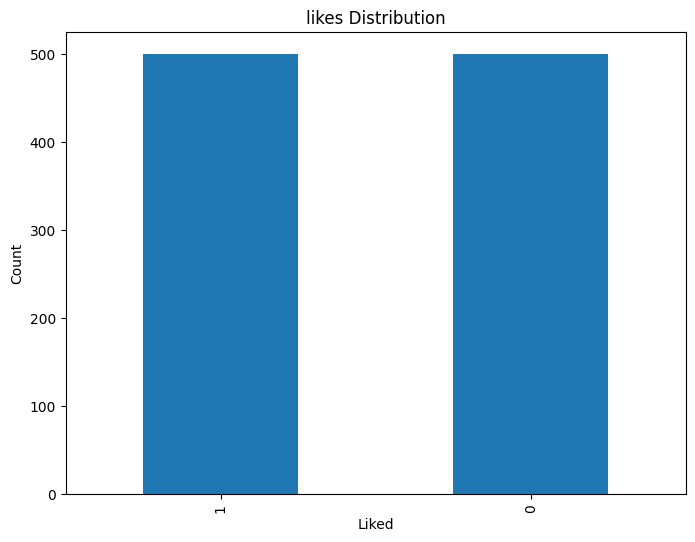

In [85]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
count.plot(kind='bar')
plt.title('likes Distribution')
plt.xlabel('Liked')
plt.ylabel('Count')
plt.show()

In [86]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Liked'] = le.fit_transform(data['Liked'])
data.head()


,Review,Liked,chat_count,word_count,sent_count,char_count
0,Wow... Loved this place.,1,24,4,2,24
1,Crust is not good.,0,18,4,1,18
2,Not tasty and the texture was just nasty.,0,41,8,1,41
3,Stopped by during the late May bank holiday of...,1,87,15,1,87
4,The selection on the menu was great and so wer...,1,59,12,1,59


In [87]:
x = data["Review"]
y = data["Liked"]

In [88]:
print(x)

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 996, dtype: object


In [89]:
print(y)

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 996, dtype: int64


In [90]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [91]:
x_test.shape

(200,)

In [92]:
y_test.shape

(200,)

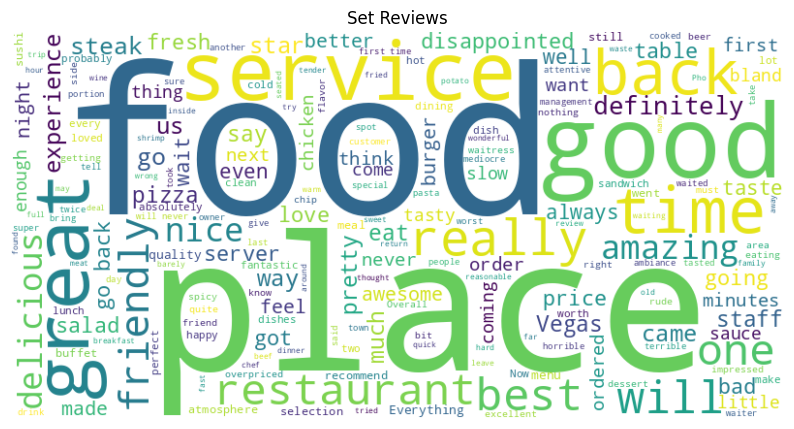

In [93]:
from wordcloud import WordCloud
text = ' '.join(x_train)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Set Reviews')
plt.show()


In [97]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
vectorizer = CountVectorizer()# Create a CountVectorizer instance
x_trainbow = vectorizer.fit_transform(x_train)# Fitting the training data
model_lr = LogisticRegression()
model_lr.fit(x_trainbow, y_train)


LogisticRegression()

In [103]:
x_testbow = vectorizer.transform(x_test)
y_predbow = model_lr.predict(x_testbow)
accuracy_bow = accuracy_score(y_test, y_predbow)
print("BoW Accuracy:", accuracy_bow)

BoW Accuracy: 0.795


In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

vectorizer = TfidfVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vector = vectorizer.transform(x_test)

logreg = LogisticRegression()
logreg.fit(x_train_vec, y_train)

y_pred_logreg = logreg.predict(x_test_vector)
report = classification_report(y_test, y_pred_logreg)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       106
           1       0.87      0.71      0.78        94

    accuracy                           0.81       200
   macro avg       0.83      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200



In [105]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
vectorizer = CountVectorizer()
X_trainbow = vectorizer.fit_transform(x_train)
X_testbow = vectorizer.transform(x_test)

In [106]:
bowmodel = MultinomialNB()
bowmodel.fit(X_trainbow, y_train)

MultinomialNB()

In [107]:
y_predictbow = bowmodel.predict(x_testbow)
bowaccuracy = accuracy_score(y_test, y_predictbow)
print("BoW Accuracy:", bowaccuracy)

BoW Accuracy: 0.78


In [108]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_predictbow)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.80       106
           1       0.80      0.71      0.75        94

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



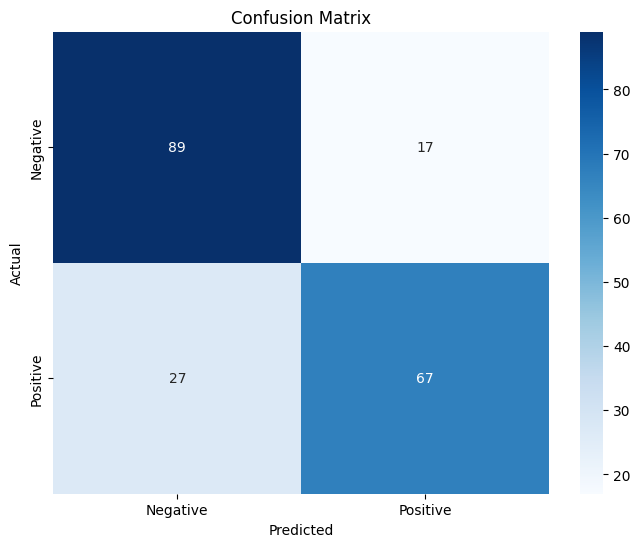

In [109]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_predictbow)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [110]:
test = "The food was very bad."
review = bowmodel.predict(vectorizer.transform([test]))
print("REVIEW:", review)

REVIEW: [0]


In [111]:
test = "The food was good"
review = bowmodel.predict(vectorizer.transform([test]))
print("REVIEW:", review)

REVIEW: [1]


In [112]:
!pip install gensim
from sklearn.manifold import TSNE

In [113]:
import gensim.downloader as api

In [114]:
glove_model=api.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [115]:
from sklearn.naive_bayes import MultinomialNB

In [212]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re

def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove non-alphanumeric characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])  # Remove stopwords
    return text

In [213]:
import numpy as np
def glovemodel(text, embedding_dim=300):
    words = text.split()
    vectors = [glove_model[word] for word in words if word in glove_model]
    if len(vectors) == 0:
        return np.zeros(embedding_dim)
    return np.mean(vectors, axis=0)  # Return the mean of the word vectors


In [214]:
# Apply the function to the reviews and GloVe vectors for training and test sets
X_trainglove = np.vstack(x_train.apply(glovemodel))
X_testglove = np.vstack(x_test.apply(glovemodel))


In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
model_glove = LogisticRegression(max_iter=500)
model_glove.fit(X_trainglove, y_train)
y_pred_glove = model_glove.predict(X_testglove)
accuracy_glove = accuracy_score(y_test, y_pred_glove)
print("GloVe Accuracy:", accuracy_glove)
report = classification_report(y_test, y_pred_glove)
print("Classification Report:\n", report)


GloVe Accuracy: 0.725
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.84      0.75        96
           1       0.81      0.62      0.70       104

    accuracy                           0.72       200
   macro avg       0.74      0.73      0.72       200
weighted avg       0.74      0.72      0.72       200



In [ ]:
# "x_train, x_test, y_train, y_test = train_test_split(x, y, test_size"=0.2, random_state=42)

In [215]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x_trainvec = vectorizer.fit_transform(x_train)#fitting the vectorizer
x_testvector = vectorizer.transform(x_test)
model_svm = SVC(kernel='linear')  # Use a linear kernel for text data
model_svm.fit(x_trainvec, y_train)

SVC(kernel='linear')

In [216]:
y_pred_svm = model_svm.predict(x_testvector)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.815
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82        96
           1       0.87      0.76      0.81       104

    accuracy                           0.81       200
   macro avg       0.82      0.82      0.81       200
weighted avg       0.82      0.81      0.81       200



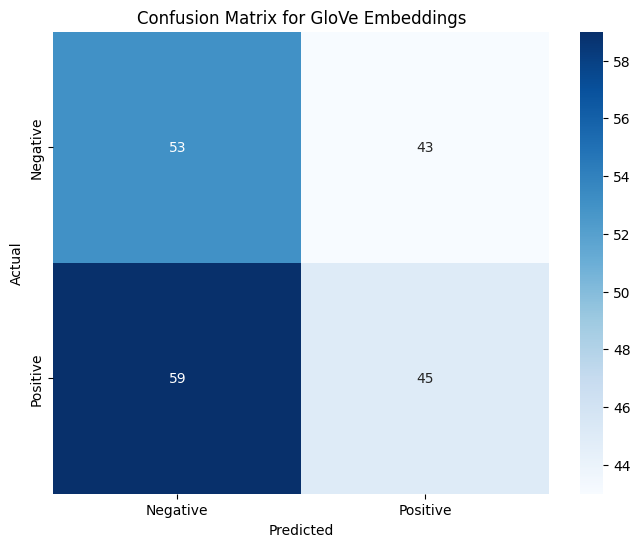

In [217]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_predglove)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for GloVe Embeddings')
plt.show()

In [218]:
test_text = "The food was absolutely fantastic!"
test_embedding = glovemodel(test_text).reshape(1, -1)
review = model_glove.predict(test_embedding)
print("Review prediction:", review)

Review prediction: [1]


In [219]:
test_text = "I will never come back, the food was terrible."
test_embedding = glovemodel(test_text).reshape(1, -1)
review = model_glove.predict(test_embedding)
print("Review prediction:", review)

Review prediction: [0]


In [167]:
from gensim.models import Word2Vec
sentences = [review.split() for review in x_train]
modelword2vec= Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

In [258]:
# Redefine your Word2Vec embedding function
def get_word2vec_embeddings(text):
    words = text.split()
    vectors = [modelword2vec.wv[word] if word in modelword2vec.wv else np.zeros(100) for word in words]
    return np.mean(vectors, axis=0)

# Use this function to create your embeddings
x_trainword2vec = np.vstack(x_train.apply(get_word2vec_embeddings))
X_testword2vec = np.vstack(x_test.apply(get_word2vec_embeddings))

In [155]:
y_predword2vec = word2vecmodel.predict(X_testword2vec)
accuracy_word2vec = accuracy_score(y_test, y_predword2vec)
print("Accuracy Word2Vec :", accuracy_word2vec)

Accuracy Word2Vec : 0.475


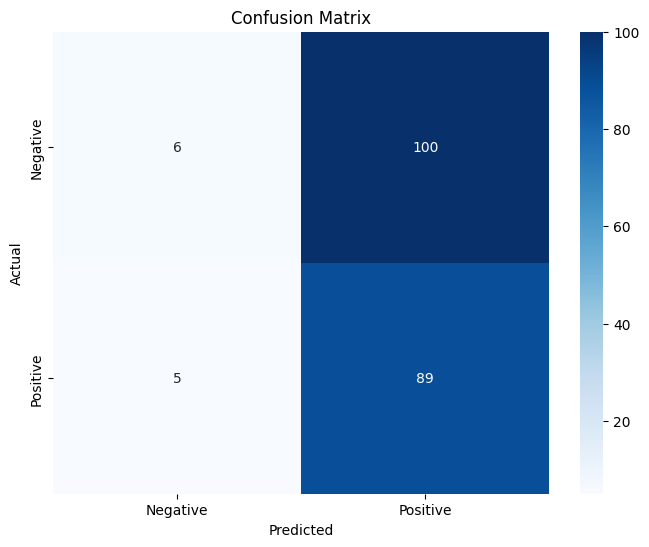

In [156]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_predword2vec)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [157]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_predword2vec)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.06      0.10       106
           1       0.47      0.95      0.63        94

    accuracy                           0.47       200
   macro avg       0.51      0.50      0.37       200
weighted avg       0.51      0.47      0.35       200



In [220]:
test = "The food is  good ."
test_embedding = get_word2vec_embeddings(test).reshape(1, -1)
review = word2vecmodel.predict(test_embedding)
print("REVIEW:", review)

REVIEW: [1]


In [260]:
test = "The food is not good ."
test_embedding = get_word2vec_embeddings(test).reshape(1, -1)
review = word2vecmodel.predict(test_embedding)
print("REVIEW:", review)

REVIEW: [1]


In [221]:
from collections import Counter
print(Counter(y_train))


Counter({0: 404, 1: 396})


In [222]:
test = "The food is not good ."
test_embedding = get_word2vec_embeddings(test).reshape(1, -1)
review = word2vecmodel.predict(test_embedding)
print("REVIEW:", review)

REVIEW: [1]


bert


In [223]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [224]:
class Foodreview(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts.tolist()  # the texts has to be in list format
        self.labels = labels.tolist()

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = tokenizer(
            text,
            padding="max_length",  #the max length
            truncation=True,
            max_length=128,# Set the max sequence length
            return_tensors="pt"# Return PyTorch tensors
        )
        # Squeeze to remove unnecessary dimensions and include 'labels' in the output
        encoding = {key: val.squeeze(0) for key, val in encoding.items()}
        encoding['labels'] = torch.tensor(label)  # Add the label
        return encoding

In [237]:
train_dataset = Foodreview(x_train, y_train)
test_dataset = Foodreview(x_test, y_test)

In [257]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
training_args = TrainingArguments(
    output_dir="./results",             # Directory to save model checkpoints
    num_train_epochs=1,                 # Number of training epochs
    per_device_train_batch_size=2,      # Batch size for training
    per_device_eval_batch_size=4,       # Batch size for evaluation
    warmup_steps=500,                   # Number of warmup steps
    max_steps=1000,         # Train for only 1000 steps
    weight_decay=0.01,                  # Weight decay for regularization
    logging_dir="./logs",               # Directory to save logs
    evaluation_strategy="epoch",        # Evaluate at the end of every epoch
    report_to="none"
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [239]:
!pip install transformers

In [252]:
from transformers import pipeline
import pandas as pd
df = pd.read_csv('Restaurant_Reviews.tsv', sep='\t')
reviewanalysis= pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")#pretrained
sample_data = data.sample(100, random_state=42)
sample_reviews = sample_data['Review'].tolist()
predictions = []
for review in sample_reviews:
    prediction = reviewanalysis(review, truncation=True, max_length=512)
    predictions.extend(prediction)
sample_data['predicted_sentiment'] = [pred['label'] for pred in predictions]
sample_data['predicted_score'] = [pred['score'] for pred in predictions]
sample_data[['Review', 'Liked', 'predicted_sentiment', 'predicted_score']].to_csv("sample_predictions.csv", index=False)#saving them in csv

Device set to use cpu


In [253]:
sample_data = pd.read_csv('sample_predictions.csv')
sample_data.head()

,Review,Liked,predicted_sentiment,predicted_score
0,If you haven't gone here GO NOW!,1,5 stars,0.443462
1,Try them in the airport to experience some tas...,1,4 stars,0.418529
2,The restaurant is very clean and has a family ...,1,5 stars,0.486406
3,"I personally love the hummus, pita, baklava, f...",1,5 stars,0.791774
4,"Come hungry, leave happy and stuffed!",1,1 star,0.391195


In [254]:
text = "I absolutely loved the food"
prediction = reviewanalysis(text)
print(f"Text: {text}")
print(f"Predicted review: {prediction[0]['label']}")
print(f"Confidence Score: {prediction[0]['score']:.2f}")

Text: I absolutely loved the food
Predicted review: 5 stars
Confidence Score: 0.76


In [255]:
text = "I did not like the food"
prediction = reviewanalysis(text)
print(f"Text: {text}")# Displaying prediction
print(f"Predicted review: {prediction[0]['label']}")
print(f"Confidence Score: {prediction[0]['score']:.2f}")

Text: I did not like the food
Predicted review: 2 stars
Confidence Score: 0.49
